<a href="https://colab.research.google.com/github/nyp-sit/nypi/blob/main/day3am/object_detection_yolov8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Custom Training with YOLOv5

In this lab exercise, we will learn to train a custom YOLOv8 model to perform object detection. To do so we will take the following steps:

* Gather a dataset of images and label our dataset
* Export our dataset to YOLOv8 format
* Train YOLOv8 to recognize the objects in our dataset
* Evaluate our YOLOv8 model's performance
* Run inference to test our deployed model



![](https://uploads-ssl.webflow.com/5f6bc60e665f54545a1e52a5/615627e5824c9c6195abfda9_computer-vision-cycle.png)

# Step 1: Install Requirements

In [1]:
!pip install -q ultralytics
!pip install -q roboflow
!pip install -q gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.6/599.6 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 77.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 78.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.4/288.4 kB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# Step 2: Assemble Our Dataset

In order to train our custom model, we need to assemble a dataset of representative images with bounding box annotations around the objects that we want to detect. And we need our dataset to be in YOLOv5 format.

In Roboflow, you can choose between two paths:

* Convert an existing dataset to YOLOv5 format. Roboflow supports over [30 formats object detection formats](https://roboflow.com/formats) for conversion.
* Upload raw images and annotate them in Roboflow with [Roboflow Annotate](https://docs.roboflow.com/annotate).

# Annotate

![](https://roboflow-darknet.s3.us-east-2.amazonaws.com/roboflow-annotate.gif)


In [2]:
from roboflow import Roboflow

rf = Roboflow(api_key="cBYcnpRQaCFSCkiX1Y7R")
project = rf.workspace("roboflow-100").project("apples-fvpl5")
dataset = project.version(2).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.117, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to apples-2 in yolov8:: 100%|██████████| 1406/1406 [00:00<00:00, 5086.95it/s]


In [4]:
%%bash

mkdir datasets
mv apples-2 datasets

In [5]:
%cd datasets
!yolo detect train data=apples-2/data.yaml model=yolov8n.pt epochs=10 imgsz=400
%cd ..

/content/datasets
100% 6.23M/6.23M [00:00<00:00, 84.6MB/s]
Ultralytics YOLOv8.0.117 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=apples-2/data.yaml, epochs=10, patience=50, batch=16, imgsz=400, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscri

In [8]:
%cd ..

/content


In [10]:
from PIL import Image
from google.colab.patches import cv2_imshow
from ultralytics import YOLO

image = Image.open('apple.jpg')
model = YOLO('datasets/runs/detect/train/weights/best.pt')
results = model(source=image, save=True)



0: 288x416 1 apple, 1 damaged_apple, 61.1ms
Speed: 4.6ms preprocess, 61.1ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/predict


In [18]:
img_rgb = results[0].plot()[:, :, [2,1,0]]
Image.fromarray(img_rgb).save('xxx.jpg')

In [30]:
from ultralytics import YOLO
from PIL import Image
import cv2

model = YOLO("runs/detect/train/weights/best.pt")
# accepts all formats - image/dir/Path/URL/video/PIL/ndarray. 0 for webcam
results = model.predict(source=img)
#results = model.predict(source="folder", show=True) # Display preds. Accepts all YOLO predict arguments

# # from PIL
# im1 = Image.open("bus.jpg")
# results = model.predict(source=im1, save=True)  # save plotted images

# # from ndarray
# im2 = cv2.imread("bus.jpg")
# results = model.predict(source=im2, save=True, save_txt=True)  # save predictions as labels

# # from list of PIL/ndarray
# results = model.predict(source=[im1, im2])


0: 288x416 1 apple, 1 damaged_apple, 8.8ms
Speed: 2.1ms preprocess, 8.8ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)


In [40]:
res_plotted.shape

(665, 1000, 3)

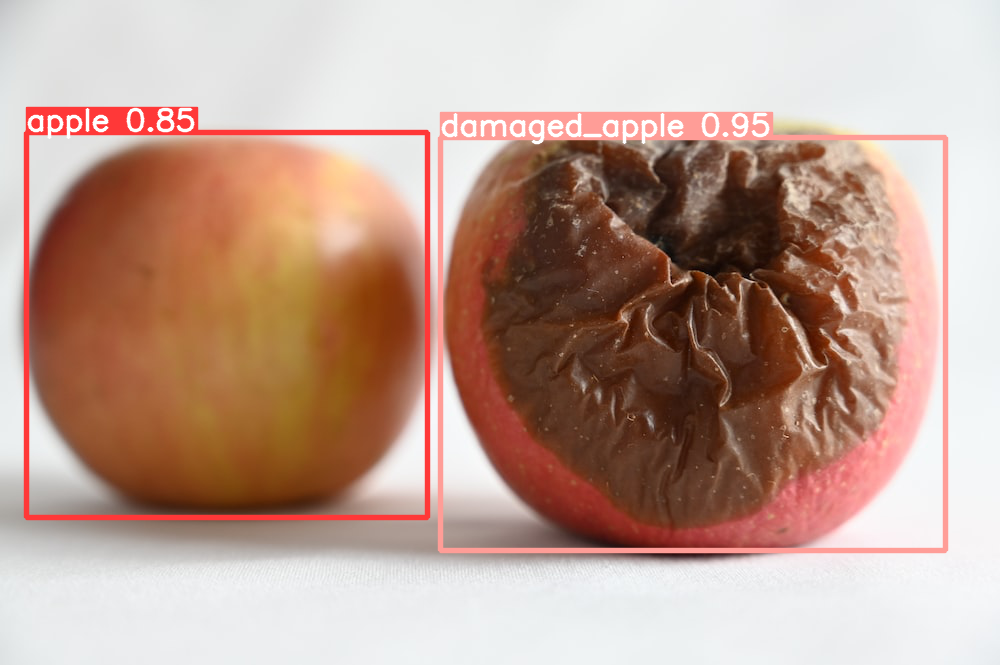

In [31]:
from google.colab.patches import cv2_imshow

res_plotted = results[0].plot()
cv2_imshow(res_plotted)


In [29]:
from PIL import Image

img = Image.open('/content/apple.jpg')

In [19]:
def predict(img):
    # accepts all formats - image/dir/Path/URL/video/PIL/ndarray. 0 for webcam
    # img.save('original.jpg')
    results = model.predict(source=img, save=True)
    res_plotted = results[0].plot()[:, :, [2, 1, 0]]
    out_img = Image.fromarray(res_plotted)
    return out_img

In [20]:
!pip install gradio
import gradio as gr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
gr.Interface(fn=predict,
             inputs=gr.Image(type="pil"),
             outputs=gr.Image()
             ).launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://24a721c556b41c1270.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
